In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#import time
from subprocess import check_output
print(check_output(["ls", "/home/brijesh/Jupyter/titanic"]).decode("utf8"))

gender_submission.csv
test.csv
titanic.ipynb
train.csv



In [94]:
data = pd.read_csv('train.csv')
submit_data_x = pd.read_csv('test.csv')

In [95]:
data.shape

(891, 12)

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
y = data.Survived.values

In [98]:
#type(y)
y.shape

(891,)

In [99]:
list = ['PassengerId','Survived','Name']
X = data.drop(list,axis = 1 )
#X.head()
list = ['PassengerId','Name']
submit_data_x = submit_data_x.drop(list,axis = 1 )
#submit_data_x.head()

In [100]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


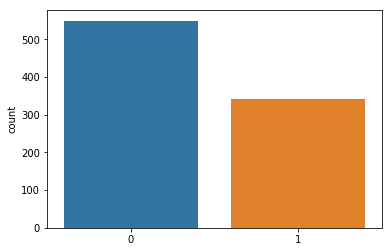

In [101]:
sns.countplot(y,label="Count")

In [132]:
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [117]:
missing_val_count_by_column = (submit_data_x.isnull().sum())
print(missing_val_count_by_column)

C          0
Q          0
S          0
female     0
male       0
Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [104]:
list = ['Ticket']
X = X.drop(list,axis = 1 )
submit_data_x = submit_data_x.drop(list,axis = 1 )

In [105]:
sex_series = X['Sex']
X = pd.concat([pd.get_dummies(sex_series),X],axis=1)
X = X.drop(['Sex'],axis = 1 )

In [107]:
X = X.drop(['Cabin'],axis = 1 )

In [108]:
X.head()

,female,male,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,22.0,1,0,7.2500,S
1,1,0,1,38.0,1,0,71.2833,C
2,1,0,3,26.0,0,0,7.9250,S
3,1,0,1,35.0,1,0,53.1000,S
4,0,1,3,35.0,0,0,8.0500,S


In [113]:
em_series = X['Embarked']
X = pd.concat([pd.get_dummies(em_series),X],axis=1)
X = X.drop(['Embarked'],axis = 1 )
X.head()

,C,Q,S,female,male,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,1,3,22.0,1,0,7.2500
1,1,0,0,1,0,1,38.0,1,0,71.2833
2,0,0,1,1,0,3,26.0,0,0,7.9250
3,0,0,1,1,0,1,35.0,1,0,53.1000
4,0,0,1,0,1,3,35.0,0,0,8.0500


In [116]:
sex_series = submit_data_x['Sex']
submit_data_x = pd.concat([pd.get_dummies(sex_series),submit_data_x],axis=1)
submit_data_x = submit_data_x.drop(['Sex'],axis = 1 )
submit_data_x = submit_data_x.drop(['Cabin'],axis = 1 )
em_series = submit_data_x['Embarked']
submit_data_x = pd.concat([pd.get_dummies(em_series),submit_data_x],axis=1)
submit_data_x = submit_data_x.drop(['Embarked'],axis = 1 )
submit_data_x.head()

,C,Q,S,female,male,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,3,34.5,0,0,7.8292
1,0,0,1,1,0,3,47.0,1,0,7.0000
2,0,1,0,0,1,2,62.0,0,0,9.6875
3,0,0,1,0,1,3,27.0,0,0,8.6625
4,0,0,1,1,0,3,22.0,1,1,12.2875


In [118]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)
submit_data_x = my_imputer.transform(submit_data_x)

In [119]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [123]:
X[1,:]

array([ 1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    , 38.    ,
        1.    ,  0.    , 71.2833])

In [122]:
submit_data_x[1,:]

array([ 0.,  0.,  1.,  1.,  0.,  3., 47.,  1.,  0.,  7.])

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [128]:
y.shape

(891,)

In [129]:
X.shape

(891, 10)

In [130]:
submit_data_x.shape

(418, 10)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
sc = StandardScaler()

In [134]:
X_train = sc.fit_transform(X_train)

In [135]:
X_test = sc.transform(X_test)
submit_data_x = sc.transform(submit_data_x)

In [136]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [138]:
estimator = LogisticRegression()
paramgrid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2']}
optimizer = GridSearchCV(estimator, paramgrid, cv=10)

In [141]:
optimizer.fit(X_train, y_train)
predict = optimizer.best_estimator_.predict(X_test)
z_o = accuracy_score(y_test,predict)
print(z_o)

/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

0.8097014925373134


/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
from sklearn.svm import SVC

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#confusion_matrix(y_test,y_pred)
#print(classification_report(y_test,y_pred))
z_o = accuracy_score(y_test,y_pred)
print(z_o)

0.8134328358208955


In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.7873134328358209


/home/brijesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [155]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [181]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu")) 
model.add(Dropout(0.2))
model.add(Dense(28, activation="relu")) 
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu")) 
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 28)                1820      
_________________________________________________________________
dropout_22 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                464       
__________

In [182]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [183]:
model.fit(X_train, y_train, batch_size = 128, epochs = 30)

Epoch 1/30
623/623 [==============================] - 2s 4ms/step - loss: 0.6989 - acc: 0.5008
Epoch 2/30
623/623 [==============================] - 0s 97us/step - loss: 0.6761 - acc: 0.6228
Epoch 3/30
623/623 [==============================] - 0s 62us/step - loss: 0.6435 - acc: 0.7111
Epoch 4/30
623/623 [==============================] - 0s 144us/step - loss: 0.6159 - acc: 0.7384
Epoch 5/30
623/623 [==============================] - 0s 153us/step - loss: 0.5802 - acc: 0.7673
Epoch 6/30
623/623 [==============================] - 0s 160us/step - loss: 0.5514 - acc: 0.7560
Epoch 7/30
623/623 [==============================] - 0s 153us/step - loss: 0.5369 - acc: 0.7657
Epoch 8/30
623/623 [==============================] - 0s 169us/step - loss: 0.5127 - acc: 0.7897
Epoch 9/30
623/623 [==============================] - 0s 181us/step - loss: 0.5004 - acc: 0.7817
Epoch 10/30
623/623 [==============================] - 0s 141us/step - loss: 0.4791 - acc: 0.7994
Epoch 11/30
623/623 [============

In [184]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)

268/268 [==============================] - 1s 2ms/step


In [185]:
print(loss,accuracy)

0.4241723765188189 0.8171641791044776


In [186]:
y_pred = model.predict_classes(X_test)

In [187]:
print(accuracy_score(y_test,y_pred))

0.8171641791044776


In [188]:
dummy_ans = pd.read_csv('gender_submission.csv')

In [189]:
dummy_ans.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [190]:
y_submit = model.predict_classes(submit_data_x)

In [191]:
data = pd.read_csv('test.csv')

In [192]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
y_submit

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [194]:
new = np.squeeze(y_submit)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [202]:
pid = data['PassengerId'].values

In [203]:
pid

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [207]:
d = {'PassengerId':pid, 'Survived': new}

In [208]:
submit_df = pd.DataFrame(d) 

In [210]:
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [223]:

submit_df.set_index('PassengerId').to_csv('new.csv')

In [224]:
r = pd.read_csv('new.csv')

In [225]:
r.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
